Imports und Weissemodell

In [2]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

In [4]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


#### plotten von lambda

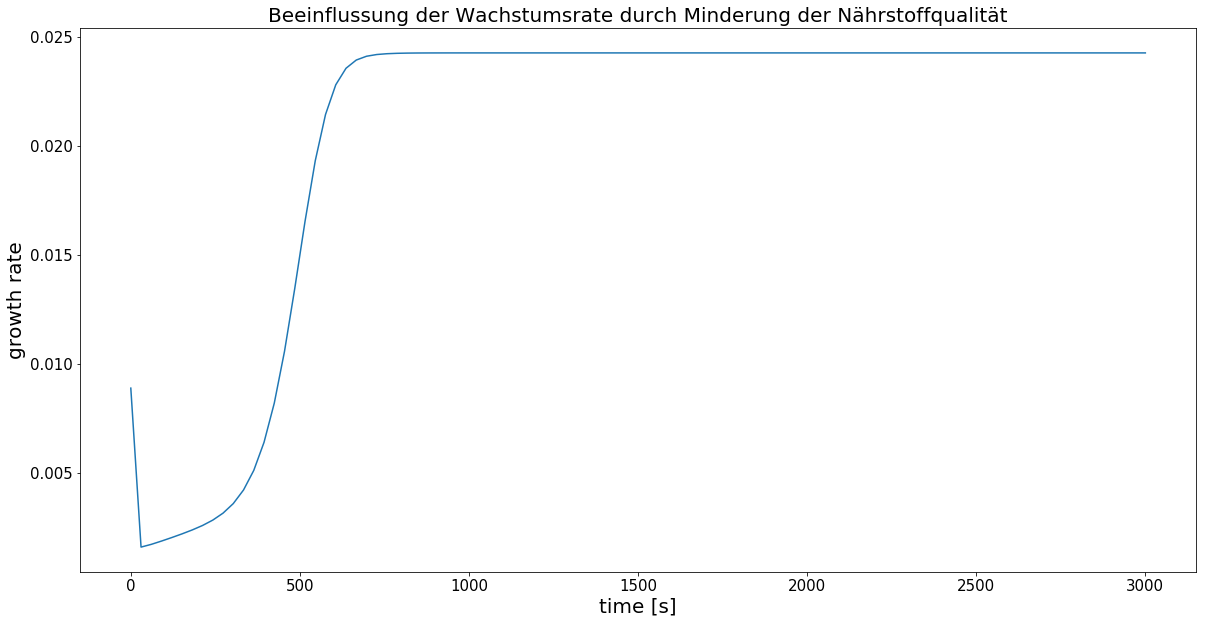

In [5]:
# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

#for i, data in enumerate(s.getT()):
plt.plot(s.getT(),s.getY()[:,16], label = 'pr') #valuesOneHundredTimeSteps[i][:,10]
#plt.legend(loc = 'lower right',prop = {'size': 20})

Optimierungfunktion zur Maximierung von Lambda

In [8]:
def Opt(p0):
    
    m = WeisseBaseModel()
    s = modelbase.Simulator(m)
    m.par.wr, m.par.wt, m.par.wm = p0
    
    #                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
    s.timeCourse(np.linspace(0,3000,100),weise_values);
    lambdanach = s.getY()[:,16][-1]
    lamda = 100 - lambdanach
    print(lamda)
    
    return (lamda)
 


In [9]:
init_guess = [930,4.14,4.14]


bounds = ((0.1,1000),(0.1,100),(0.1,100))

In [10]:
fit = spo.minimize(Opt, init_guess, bounds = bounds)

99.97573718721809
99.97573718721814
99.97573718718165
99.97573718722182
99.97572377422281
99.97572377422287
99.9757237741864
99.97572377422655
99.96269808945368
99.96269808945374
99.96269808943356
99.96269808945722
99.96480699532063
99.96480699532069
99.96480699532391
99.96480699510889
99.95698983139339
99.95698983139344
99.95698983137811
99.95698983139665
99.99426357199113
99.99426357199113
99.99426357199198
99.99426357149147
99.9548698654256
99.95486986542564
99.95486986541185
99.95486986542869
99.96641998149433
99.96641998149437
99.96641998149742
99.96641998127579
99.9542507263771
99.95425072637714
99.9542507263638
99.95425072638002
99.99465065390355
99.99465065390356
99.99465065390426
99.99465065343364
99.95564562403517
99.95564562403523
99.95564562403825
99.9556456238875
99.95386772126558
99.95386772126562
99.9538677212527
99.95386772126709
99.95486195930538
99.95486195930543
99.95486195930845
99.95486195916195
99.95373780851638
99.95373780851644
99.95373780850571
99.9537378084995

In [11]:
fit

      fun: 99.91699204114586
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.84217094e-06, -1.89004368e-04, -4.26325641e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 176
      nit: 14
   status: 0
  success: True
        x: array([577.96323124, 100.        ,  11.5054712 ])

überschreiben der Parameter in Fit-werte

In [6]:
mneu = WeisseBaseModel()

#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values_neu = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])


mneu.par.update({'wr':577.96323124})
mneu.par.update({'wt':100. })
mneu.par.update({'wm':11.5054712})

sneu = modelbase.Simulator(mneu)
sneu.timeCourse(np.linspace(0,3000,100),weise_values_neu);


Plotten des Wachtums vor und nach dem Fit

Text(0, 0.5, 'concentration [a.u.]')

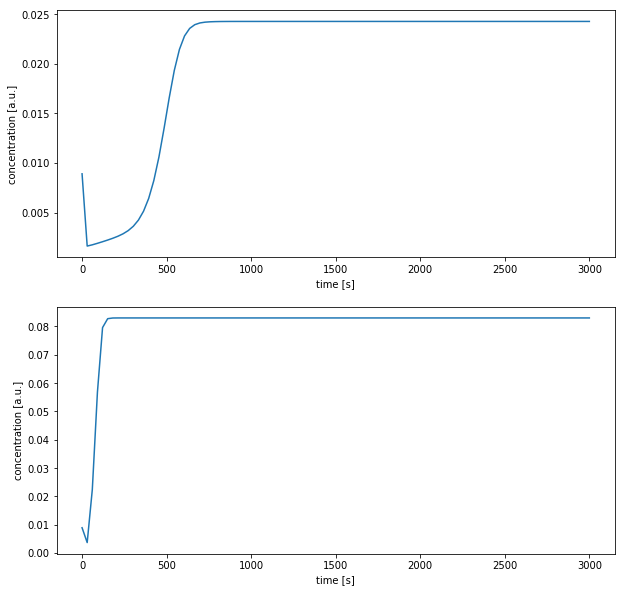

In [7]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getY()[:,16])
#Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[1:2]),label = cl[1])
#Plotlist[0].set_title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')


#Plotlist[0].plot(s.getT(),s.getRate('vr'))
Plotlist[1].plot(sneu.getT(),sneu.getY()[:,16])
#Plotlist[1].set_title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')

model ohne fit 

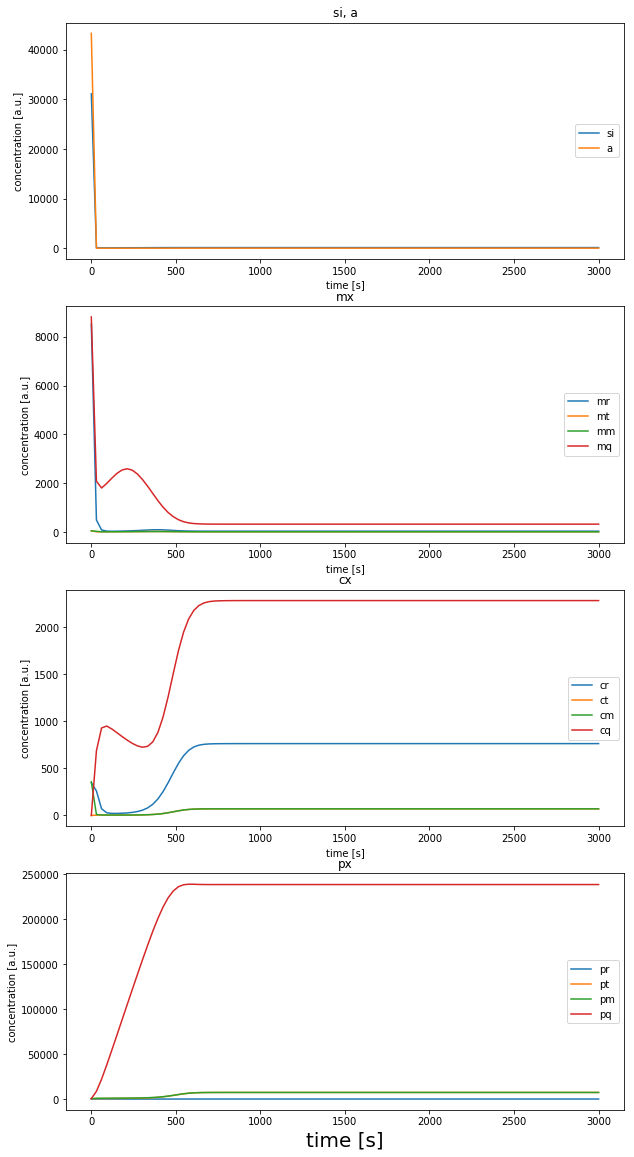

In [49]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(s.getT(),s.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[4:5]),label = cl[4])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(s.getT(),s.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(s.getT(),s.getVarsByName(cl[10:11]), label = cl[10])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[11:12]),label = cl[11])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')



Model mit Fit

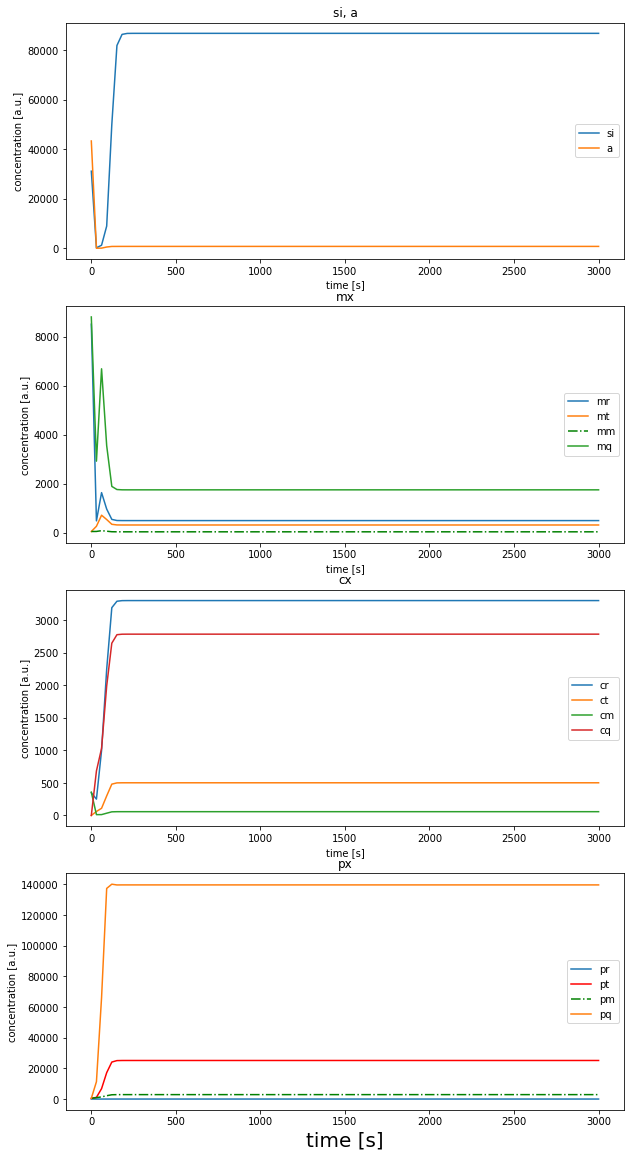

In [50]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[4:5]),'g-.',label = cl[4])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
#Plotlist[1].set_xlim(25,50)
#Plotlist[1].set_ylim(0,0.5)
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[10:11]), label = cl[10])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[11:12]),'r-',label = cl[11])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[12:13]),'g-.',label = cl[12])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')

Vergleich von vr

(0, 1000)

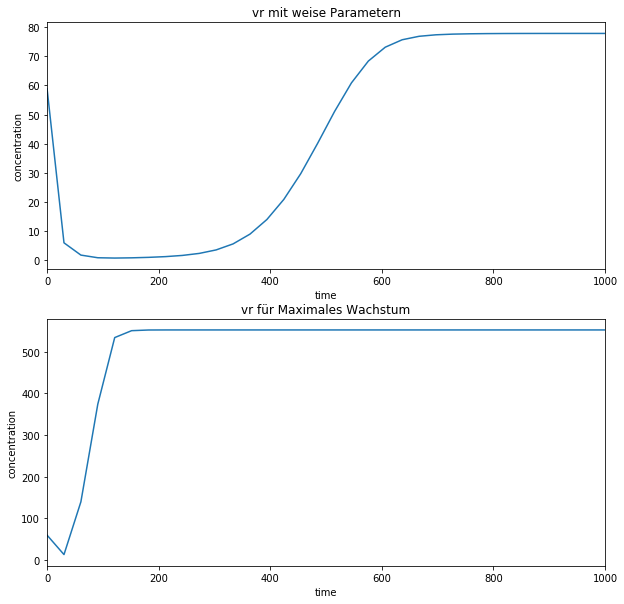

In [51]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vr'))
Plotlist[0].set_title('vr mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vr'))
Plotlist[1].set_title('vr für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vt

(0, 1000)

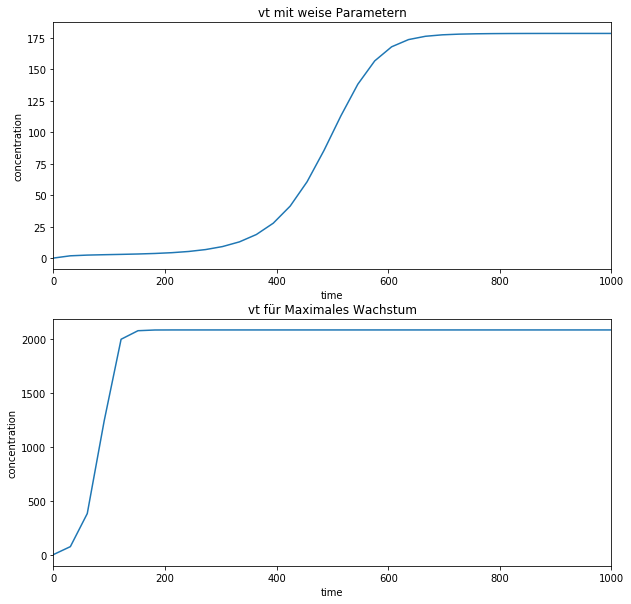

In [52]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vt'))
Plotlist[0].set_title('vt mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vt'))
Plotlist[1].set_title('vt für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vm

(0, 1000)

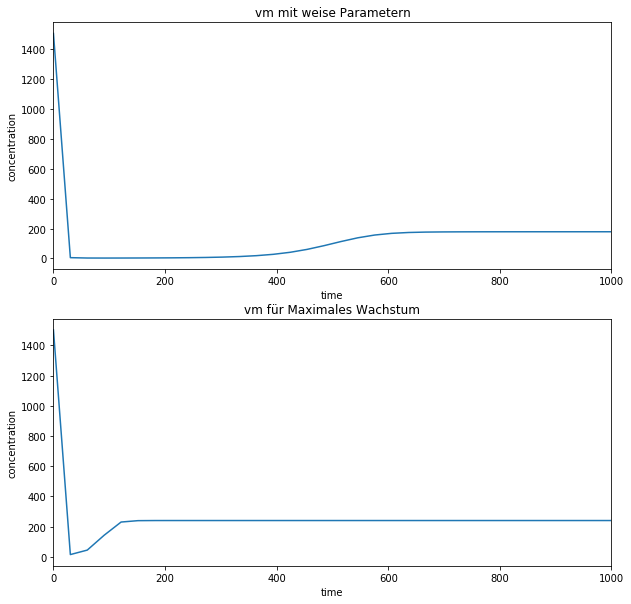

In [53]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vm'))
Plotlist[0].set_title('vm mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vm'))
Plotlist[1].set_title('vm für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vq

(0, 1000)

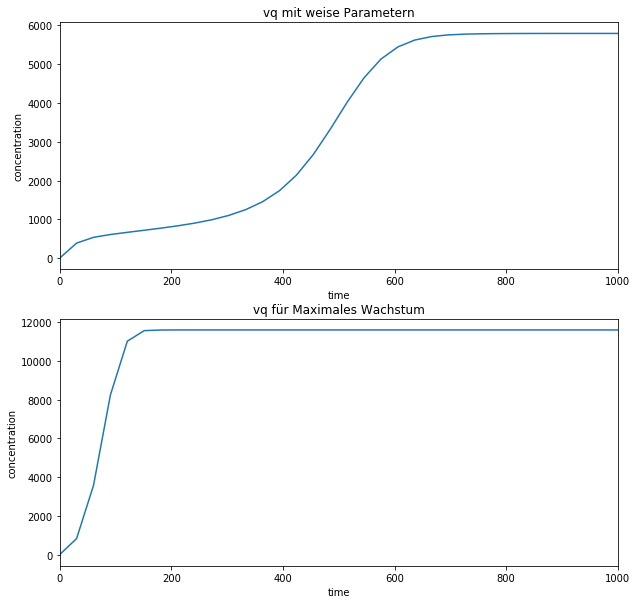

In [54]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vq'))
Plotlist[0].set_title('vq mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vq'))
Plotlist[1].set_title('vq für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


Vergleich von vimp

(0, 1000)

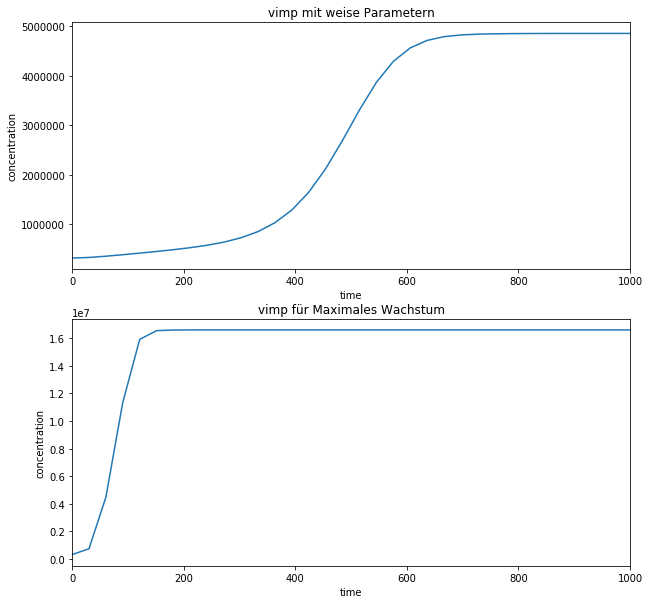

In [55]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vimp'))
Plotlist[0].set_title('vimp mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vimp'))
Plotlist[1].set_title('vimp für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


Vergleich von vcat

(0, 1000)

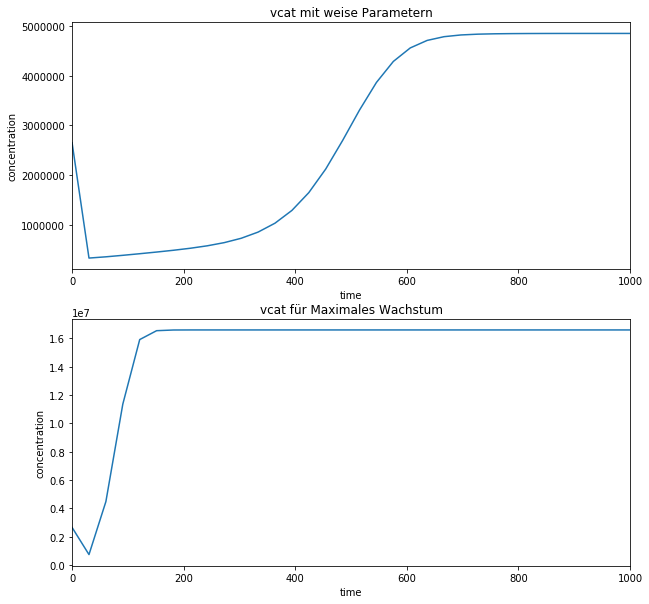

In [56]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vcat'))
Plotlist[0].set_title('vcat mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vcat'))
Plotlist[1].set_title('vcat für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


In [57]:
mneu.stoichiometries

{'vimp': {'si': 1},
 'vcat': {'si': -1, 'a': 0.5},
 'vr': {'a': -7459, 'pr': 2, 'mr': 1, 'cr': -1},
 'vt': {'a': -300, 'pr': 1, 'pt': 1, 'mt': 1, 'ct': -1},
 'vm': {'a': -300, 'pr': 1, 'pm': 1, 'mm': 1, 'cm': -1},
 'vq': {'a': -300, 'pr': 1, 'pq': 1, 'mq': 1, 'cq': -1},
 'cbur': {'pr': -1, 'mr': -1, 'cr': 1},
 'cbut': {'pr': -1, 'mt': -1, 'ct': 1},
 'cbum': {'pr': -1, 'mm': -1, 'cm': 1},
 'cbuq': {'pr': -1, 'mq': -1, 'cq': 1},
 'omegar': {'mr': 1},
 'degmr': {'mr': -1},
 'omegat': {'mt': 1},
 'degmt': {'mt': -1},
 'omegam': {'mm': 1},
 'degmm': {'mm': -1},
 'omegaq': {'mq': 1},
 'degmq': {'mq': -1},
 'dilution_si': {'si': -1},
 'dilution_a': {'a': -1},
 'dilution_mr': {'mr': -1},
 'dilution_mt': {'mt': -1},
 'dilution_mm': {'mm': -1},
 'dilution_mq': {'mq': -1},
 'dilution_cr': {'cr': -1},
 'dilution_ct': {'ct': -1},
 'dilution_cm': {'cm': -1},
 'dilution_cq': {'cq': -1},
 'dilution_pr': {'pr': -1},
 'dilution_pt': {'pt': -1},
 'dilution_pm': {'pm': -1},
 'dilution_pq': {'pq': -1}}

# Veränderung des Verhältnisses von vr,vt,vm und vq  über die Zeit

array zu listen

In [9]:
vr = sneu.getRate('vr').tolist()
vt = sneu.getRate('vt').tolist()
vm = sneu.getRate('vm').tolist()
lambdawert = s.getY()[:,16]

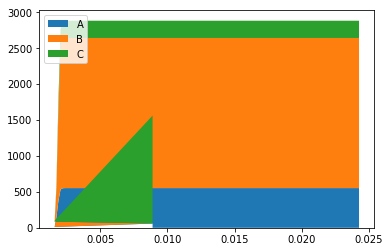

In [14]:
# Your x and y axis
#x= lambdawert#range(0,100)
#y=[ vr, vt, vm, vq ]

# Basic stacked area chart.
#plt.stackplot(x,y, labels=['A','B','C','D'])
#plt.legend(loc='upper left')
#plt.show()

# --- FORMAT 2</pre>
x = lambdawert#range(0,100)
y1 = vr
y2 = vt
y3 = vm

# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3 ,labels=['A','B','C'])
plt.legend(loc='upper left')

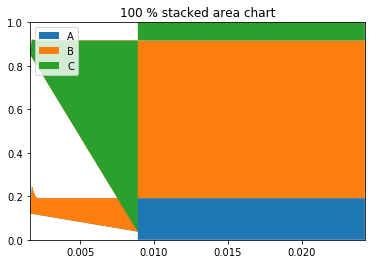

In [12]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Make data
data = pd.DataFrame({'group_A':vr, 'group_B':vt, 'group_C':vm}, index=lambdawert)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawert,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()
